In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from anomaly_flow.data.netflow import NetFlowV2
from anomaly_flow.train.trainer_flow_nids import GANomaly
from pathlib import Path
import tensorflow as tf 
import json
from anomaly_flow.data.synthetic_data import generate_synthetic_data
from anomaly_flow.view.distribution_plot import generate_dist_plot

l:\Experimentos\anomaly-flow\.env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = "0"

hps = dict()

with open('hps.json', 'r', encoding='utf-8') as file:
    hps = json.load(file)

In [3]:
dataset_name = "NF-ToN-IoT-v2-DDoS-downsample"
netflow_dataset = NetFlowV2(dataset_name, train_size=100000)

netflow_dataset.configure(
    hps["batch_size"], 52, 1,
    hps["shuffle_buffer_size"], True, True
)

Loading dataset NF-ToN-IoT-v2-DDoS-downsample...
Loaded dataset NF-ToN-IoT-v2-DDoS-downsample [OK]
Initialized Columns Split Preprocessing.
Using cached file: 0c64a61de3189470f64df188bc55130f.
Finished Columns Split Preprocessing. [OK]
Experiments using the following columns: 
PROTOCOL
IN_BYTES
IN_PKTS
OUT_BYTES
OUT_PKTS
FLOW_DURATION_MILLISECONDS
DURATION_IN
DURATION_OUT
MIN_TTL
MAX_TTL
LONGEST_FLOW_PKT
SHORTEST_FLOW_PKT
MIN_IP_PKT_LEN
MAX_IP_PKT_LEN
SRC_TO_DST_SECOND_BYTES
DST_TO_SRC_SECOND_BYTES
RETRANSMITTED_IN_BYTES
RETRANSMITTED_IN_PKTS
RETRANSMITTED_OUT_BYTES
RETRANSMITTED_OUT_PKTS
SRC_TO_DST_AVG_THROUGHPUT
DST_TO_SRC_AVG_THROUGHPUT
NUM_PKTS_UP_TO_128_BYTES
NUM_PKTS_128_TO_256_BYTES
NUM_PKTS_256_TO_512_BYTES
NUM_PKTS_512_TO_1024_BYTES
NUM_PKTS_1024_TO_1514_BYTES
TCP_WIN_MAX_IN
TCP_WIN_MAX_OUT
ICMP_TYPE
ICMP_IPV4_TYPE
DNS_QUERY_ID
DNS_QUERY_TYPE
DNS_TTL_ANSWER
URGENT_POINTER
ACKNOWLEDGEMENT
PUSH
RESET
SYNCHRONISATION
FIN
CLIENT_URGENT_POINTER
CLIENT_ACKNOWLEDGEMENT
CLIENT_PUSH
CL

In [4]:
netflow_trainer = GANomaly(netflow_dataset, hps, tf.summary.create_file_writer("logs"), Path("log"))

netflow_trainer.train(
    hps["epochs"], hps["adversarial_loss_weight"], hps["contextual_loss_weight"],
    hps["enc_loss_weight"], hps["step_log_frequency"]
)

Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.6540108323097229
Best AUC-ROC on validation set:  0.654010832
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (Non

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  450 . d_loss:  1.38384402 , g_loss:  1.54253387 , e_loss:  0.00081029447 lr:  0.0002
Step  500 . d_loss:  1.38448656 , g_loss:  1.53091133 , e_loss:  0.000752501423 lr:  0.0002
Step  550 . d_loss:  1.38498878 , g_loss:  1.5195297 , e_loss:  0.000705516315 lr:  0.0002
Step  600 . d_loss:  1.38552439 , g_loss:  1.51187193 , e_loss:  0.000687349413 lr:  0.0002
Step  650 . d_loss:  1.38570368 , g_loss:  1.50238681 , e_loss:  0.000655647716 lr:  0.0002
Step  700 . d_loss:  1.38575208 , g_loss:  1.49750233 , e_loss:  0.000647754 lr:  0.0002
Step  750 . d_loss:  1.38575828 , g_loss:  1.49308836 , e_loss:  0.000643027131 lr:  0.0002
Step  800 . d_loss:  1.38587117 , g_loss:  1.48680425 , e_loss:  0.000626940629 lr:  0.0002
1 Epoch completed
Threshold using only benign data: 0.09841091185808182
Optimized Threshold based on F1-Score value 0.04040404040404041
NF-ToN-IoT-v2-DDoS-downsample: 
Validation f1-score: 0.4223288036237677
Validation f2-score: 0.3926377328577091
Validation accuracy: 

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_rc\discriminator\assets


Validation Current AUC ROC: 0.6642393469810486
Best AUC-ROC on validation set:  0.664239347
Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               33024     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               131584    
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 512)               0         
                                                                 
 batch_normalization (Batch  (None, 512)               2048      
 Normalization)                                                  
                                                                 
 dense_6 (Dense)             (Non

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\generator\assets


Model: "encoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              54272     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 batch_normalization_2 (Bat  (None, 512)               2048      
 chNormalization)                                                
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 256)               131328    
                                                           

INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\encoder\assets


Model: "discriminator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256)               710400    
                                                                 
 dense_3 (Dense)             multiple                  256       
                                                                 
Total params: 710656 (2.71 MB)
Trainable params: 710656 (2.71 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


INFO:tensorflow:Assets written to: log\NF-ToN-IoT-v2-DDoS-downsample\results\auc_roc\discriminator\assets


Step  850 . d_loss:  1.38583791 , g_loss:  1.44402146 , e_loss:  0.000518960471 lr:  0.0002
Step  900 . d_loss:  1.38621759 , g_loss:  1.43352437 , e_loss:  0.000478196773 lr:  0.0002
Step  950 . d_loss:  1.38636148 , g_loss:  1.42807555 , e_loss:  0.000452177308 lr:  0.0002
Step  1000 . d_loss:  1.3863678 , g_loss:  1.42696512 , e_loss:  0.000458490598 lr:  0.0002
Step  1050 . d_loss:  1.38632894 , g_loss:  1.4225111 , e_loss:  0.000442908786 lr:  0.0002
Step  1100 . d_loss:  1.38636315 , g_loss:  1.42078984 , e_loss:  0.000438205694 lr:  0.0002
Step  1150 . d_loss:  1.38647032 , g_loss:  1.41875207 , e_loss:  0.000434798421 lr:  0.0002
Step  1200 . d_loss:  1.3864634 , g_loss:  1.41720212 , e_loss:  0.000431631139 lr:  0.0002
2 Epoch completed
Threshold using only benign data: 0.091200090944767
Optimized Threshold based on F1-Score value 0.06060606060606061
NF-ToN-IoT-v2-DDoS-downsample: 
Validation f1-score: 0.5658107795512376
Validation f2-score: 0.5735321703245169
Validation accur

(0.45482683,
 0.64756495,
 0.16758508914100487,
 0.1371498302207131,
 0.4855769230769231)

[Info] Test dataset not provided, using models local data.



Using the best model selected via  auc_rc
Experiment 'NF-ToN-IoT-v2-DDoS-downsample' Results
Test AUC-RC: 0.685
Test AUC-ROC: 0.848
Test F1-Score: 0.665
Test F2-Score: 0.633
Test Accuracy: 0.738


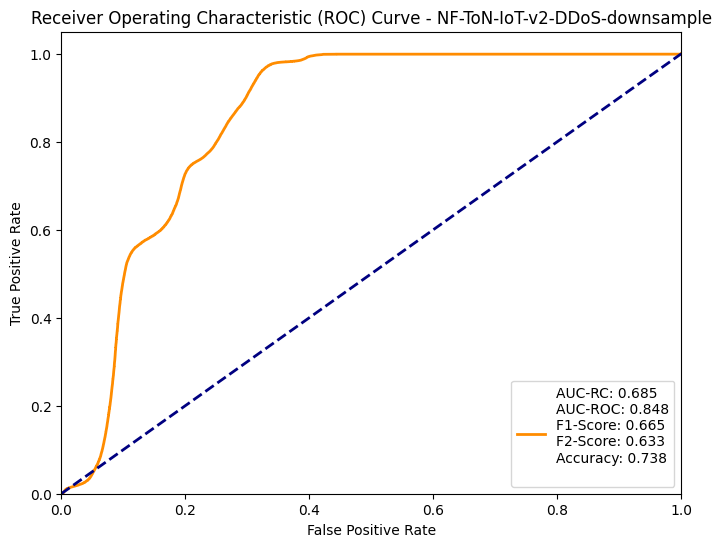

<Figure size 800x600 with 0 Axes>

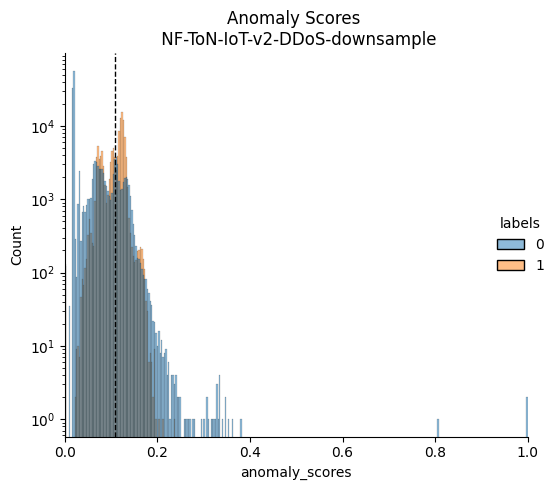

Using the best model selected via  auc_roc
Experiment 'NF-ToN-IoT-v2-DDoS-downsample' Results
Test AUC-RC: 0.685
Test AUC-ROC: 0.848
Test F1-Score: 0.665
Test F2-Score: 0.633
Test Accuracy: 0.738


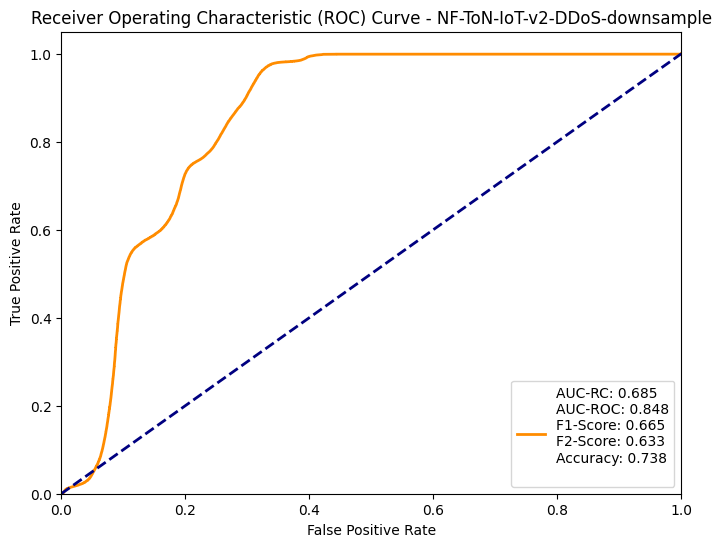

<Figure size 800x600 with 0 Axes>

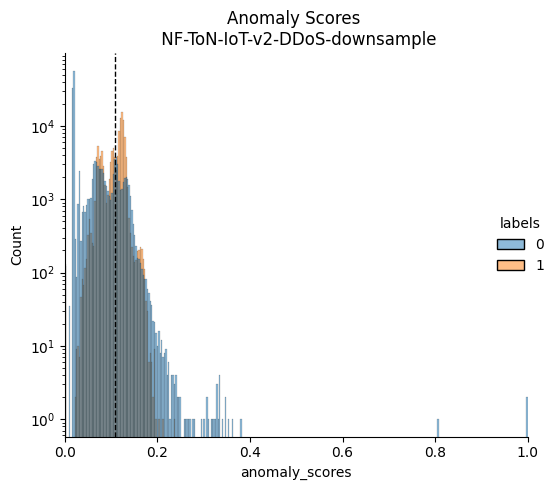

(0.6853517,
 0.84801996,
 0.6653182650969579,
 0.6325703809357909,
 0.7382830231502496)

In [5]:
netflow_trainer.test()

In [6]:
print(tf.__version__)

2.15.0


In [7]:
number_of_samples = 100000

synthetic_dataset = generate_synthetic_data(
                        netflow_trainer.get_generator(), 
                        number_of_samples=number_of_samples, 
                        columns=netflow_dataset.get_columns(),
                        latent_vector_size=hps['latent_vector_size'],
                        scaler=netflow_dataset.get_scaler())

# synthetic_dataset
synthetic_dataset.to_parquet("./datasets/synthetic_ton_iot_ganomaly.parquet")

In [8]:
test_df = netflow_dataset.get_test_distribution()

test_df

,PROTOCOL,IN_BYTES,IN_PKTS,OUT_BYTES,OUT_PKTS,FLOW_DURATION_MILLISECONDS,DURATION_IN,DURATION_OUT,MIN_TTL,MAX_TTL,...,CLIENT_RESET,CLIENT_SYNCHRONISATION,CLIENT_FIN,SERVER_URGENT_POINTER,SERVER_ACKNOWLEDGEMENT,SERVER_PUSH,SERVER_RESET,SERVER_SYNCHRONISATION,SERVER_FIN,Label
0,6.0,120.0,2.0,104.0,2.0,4294951.0,16.0,16.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
2,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
3,17.0,138.0,2.0,234.0,2.0,0.0,0.0,0.0,64.0,64.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282037,6.0,268.0,5.0,164.0,3.0,4294592.0,375.0,328.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN
282038,6.0,44.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,NaN
282039,6.0,276.0,5.0,172.0,3.0,4294452.0,515.0,515.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN
282040,6.0,224.0,4.0,224.0,4.0,4294655.0,281.0,312.0,64.0,64.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN


l:\Experimentos\anomaly-flow\.env\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
l:\Experimentos\anomaly-flow\.env\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
l:\Experimentos\anomaly-flow\.env\lib\site-packages\seaborn\distributions.py:2125: UserWarning: `displot` is a figure-level function and does not accept the ax= parameter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)


<Figure size 1000x600 with 0 Axes>

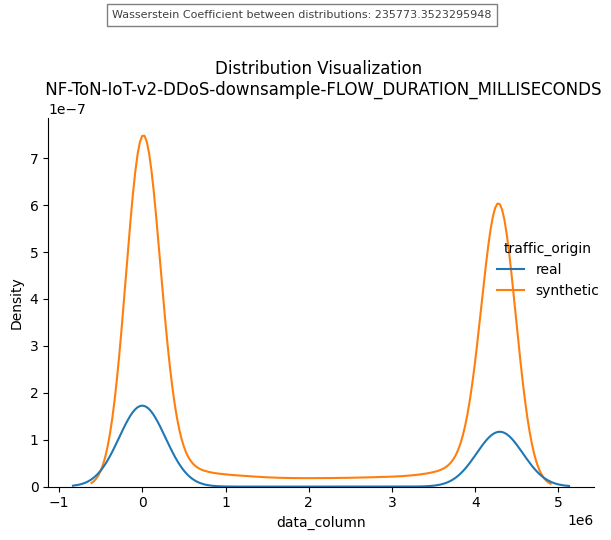

<Figure size 1000x600 with 0 Axes>

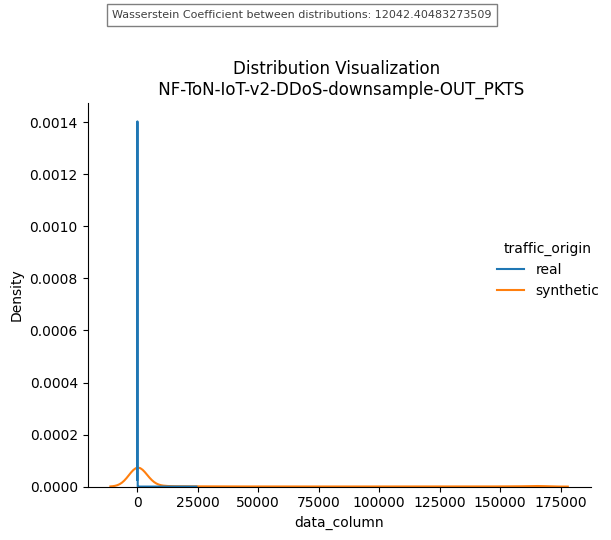

<Figure size 1000x600 with 0 Axes>

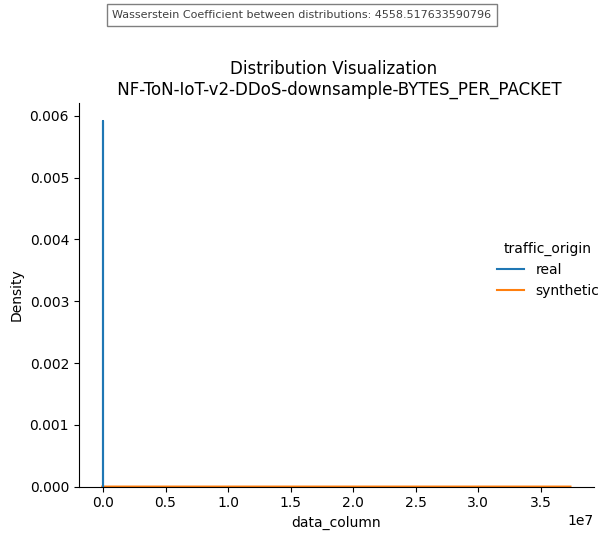

In [9]:
# features_to_plot = list(test_df.columns)
features_to_plot = ["FLOW_DURATION_MILLISECONDS", "OUT_PKTS", "BYTES_PER_PACKET"]

# Filter only the benign samples to evaluate
test_df = netflow_dataset.get_test_distribution()
test_df = test_df[test_df["Label"] == 0]

test_df["BYTES_PER_PACKET"] = test_df["IN_BYTES"] / test_df["IN_PKTS"]
synthetic_dataset["BYTES_PER_PACKET"] = synthetic_dataset["IN_BYTES"] / synthetic_dataset["IN_PKTS"]

for i, feature in enumerate(features_to_plot):
    generate_dist_plot(
        series=test_df[feature][:number_of_samples], 
        comparison_series=synthetic_dataset[feature], 
        title=f"{dataset_name}-{feature}", 
        save_to_file=True,
        ax=None
    )